# COGS 108 - Final Project 

# Overview

In this project we gathered information regarding song audio attributes using a dataset from the Spotify API. We utilized this dataset to find trends in audio attributes across different music genres and analyze which attributes are significant in defining boundaries between genres. From there we attempted to create a model that can predict a song’s genre based on these significant attributes.

# Names

- Bilal Salinggih
- James Yu
- Jared Suasin
- Dilraj Sandhu
- Franz Quijano

###### Group Members IDs

- A13674432
- A15598575
- A12650991
- A15747688
- A13143611

# Research Question

Is there a correlation between different attributes of a song and it’s music genre? Can we predict trends in attributes (i.e. danceability, energy, etc.) within different music genres?

## Background and Prior Work

Traditionally, music is separated into specific genres. People are familiar with common genres such as country, hip-hop, classical, and beyond, however as music continues to evolve, the lines between genres become more blurred. A recent example of this is Lil Nas X’s song ‘Old Town Road’, a country song with rap elements. ‘Old Town Road’ was removed from Billboard’s ‘Top Country Songs’ chart because Billboard determined that the song itself wasn’t representative enough of Country elements to be included on the ranking. From this instance we can see that it can be difficult to define the boundaries of where one genre ends and another begins.

Previous studies have been conducted to attempt genre prediction from song attributes. One machine learning study from the University of Rome Tor Vergata tried to classify music genres using MIDI files and analyzed the instrumentation composition of songs (https://pdfs.semanticscholar.org/e214/5add1318af0654a4901fe92080bc8168a9f4.pdf). Another independent study by Victor Ramirez utilized K-Means Clustering to categorize music genres. Ramirez separated songs into different 8 K-Means labels (i.e. Fast & Danceable Instrumentals, Slow Dance, Happy & Upbeat Instrumentals, Slow & Somber Acoustics) and analyzed the audio attributes within each label to find trends (https://medium.com/latinxinai/discovering-descriptive-music-genres-using-k-means-clustering-d19bdea5e443).

Using the findings from these studies we believe that the audio attributes significant in predicting a song’s genre are ‘acousticness’, ‘instrumentalness’, ‘danceability’, ‘tempo’, and ‘energy’. We believe ‘acousticness’ and ‘instrumentalness’ can predict a song’s genre as the University of Rome Tor Vergata study was able to classify genres through instrumentation. Similarly, we also believe that ‘danceability’, ‘tempo’, and ‘energy’ can be used to predict a song’s genre as Ramirez was also able to highlight differences across categories based on these audial features.


# Hypothesis


We hypothesize that certain audio attributes will have significant difference across genres such that it is possible to define genre boundaries and predict songs within genres. In particular, we predict that the attributes of ‘acousticness’, ‘danceability’, ‘instrumentalness’, ‘tempo’, and ‘energy’ can be used to determine a song’s genre.

We believe our hypothesis is true because every genre has unique audial characteristics. These characteristics define each genre and need to be different enough from one another in order to show significant differences.

# Dataset(s)

Dataset Name: Ultimate Spotify Tracks DB 

Link to the dataset: https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db 
Number of observations: 228,159

Since we are attempting to predict attribute trends between genres, we utilized data from a Spotify API dataset. This dataset provides data on over 228,000 songs across 26 genres. It includes song attributes determined by Spotify’s algorithms including tempo, key, danceability, energy and more. We used this dataset to find correlations between music genres and the different attributes associated with the songs within these genres.


# Setup

In [10]:
## YOUR CODE HERE
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

#added imports for linear regression stuff and plotting
plt.rcParams['figure.figsize'] = (17, 7)
plt.rcParams.update({'font.size': 18})
# Statmodels & patsy
import patsy
import statsmodels.api as sm

# Data Cleaning

Reading in data from csv.

In [11]:
df = pd.read_csv('SpotifyFeatures.csv')
df.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Opera,Giuseppe Verdi,"Stiffelio, Act III: Ei fugge! … Lina, pensai c...",7EsKYeHtTc4H4xWiTqSVZA,21,0.986,0.313,490867,0.23100,0.000431,C#,0.0964,-14.287,Major,0.0547,86.001,4/4,0.0886
1,Opera,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,7MfmRBvqaW0I6UTxXnad8p,18,0.972,0.360,176797,0.20100,0.028000,D#,0.1330,-19.794,Major,0.0581,131.798,4/4,0.3690
2,Opera,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",7pBo1GDhIysyUMFXiDVoON,10,0.935,0.168,266184,0.47000,0.020400,C,0.3630,-8.415,Major,0.0383,75.126,3/4,0.0696
3,Opera,Giuseppe Verdi,"Rigoletto, Act IV: Venti scudi hai tu detto?",02mvYZX5aKNzdqEo6jF20m,17,0.961,0.250,288573,0.00605,0.000000,D,0.1200,-33.440,Major,0.0480,76.493,4/4,0.0380
4,Opera,Giuseppe Verdi,"Don Carlo / Act 4: ""Ella giammai m'amò!""",03TW0jwGMGhUabAjOpB1T9,19,0.985,0.142,629760,0.05800,0.146000,D,0.0969,-23.625,Major,0.0493,172.935,4/4,0.0382


Checking for any null values in any of the columns

In [12]:
df[df.isnull().any(axis=1)]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence


There are no rows with null values.

Checking the basic descriptive statistics of the data to look for any unreasonable values

In [13]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,228159.000000,228159.000000,228159.000000,2.281590e+05,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000
mean,44.209130,0.351200,0.554198,2.366092e+05,0.580967,0.137310,0.214638,-9.354658,0.122442,117.423062,0.444795
std,17.276599,0.351385,0.183949,1.166787e+05,0.260577,0.292447,0.196977,5.940994,0.186264,30.712458,0.255397
min,0.000000,0.000001,0.056900,1.550900e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,33.000000,0.030900,0.437000,1.862530e+05,0.405000,0.000000,0.097700,-11.287000,0.036800,92.734000,0.232000
50%,47.000000,0.205000,0.570000,2.211730e+05,0.618000,0.000037,0.128000,-7.515000,0.050600,115.347000,0.430000
75%,57.000000,0.689000,0.690000,2.648400e+05,0.793000,0.023400,0.263000,-5.415000,0.109000,138.887000,0.643000
max,100.000000,0.996000,0.987000,5.552917e+06,0.999000,0.999000,1.000000,1.585000,0.967000,239.848000,1.000000


From this we can determine how variables are measured by Spotify's API.
Popularity is on a scale from 0-100, from least to most popular. This is likely ranked from Spotify's streaming data which counts the number of streams a particular song has.
Acousticness, danceability, energy, instrumentalness, liveness, speechiness, and valence are on a scale from 0.0 - 1.0, from lowest to highest.
This is likely determined by Spotify's API from their audio recognition and machine learning models.
Duration_ms is how long the song is in milliseconds.
Loudness is based on the average decibel level of each song.
Tempo is based on the bpm, or beats per minute of the song.

Additionally, from looking at the basic descriptive statistics, it seems as though there are no clear outliers within the data that we can currently see. We now understand the scale to which each variable is measured.

Now we can explore the data further, first by counting the number of songs

In [14]:
# number of songs per genre. a-capella has the least # of songs
df['genre'].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Blues               9353
Children’s Music    9353
Anime               9353
Alternative         9353
Folk                9299
Hip-Hop             9295
Rock                9272
Classical           9256
Rap                 9232
World               9096
Soul                9089
R&B                 8992
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
A Capella            119
Name: genre, dtype: int64

In [15]:
# tried to get the most commmon artists per genre, need to fix
test = df.groupby(['genre']).agg(lambda x: x.value_counts().index[0])
test = test['artist_name']
test

genre
A Capella              The Singers Unlimited
Alternative          Five Finger Death Punch
Anime                Five Finger Death Punch
Blues                Five Finger Death Punch
Children’s Music     Five Finger Death Punch
Classical            Wolfgang Amadeus Mozart
Comedy                         George Carlin
Country                        George Strait
Dance                            Chris Brown
Electronic                              Moby
Folk                               Bob Dylan
Hip-Hop                               Eminem
Indie                                 G-Eazy
Jazz                             Miles Davis
Movie                           Randy Newman
Opera                         Giuseppe Verdi
Pop                                    Drake
R&B                              Chris Brown
Rap                                    Drake
Reggae              Bob Marley & The Wailers
Reggaeton                       Daddy Yankee
Rock                             The Beatles
Ska 

In [16]:
# average popularity of songs per genre - indicates how popular each genre is
average_popularity = df.groupby(['genre']).mean().sort_values(by='popularity', ascending=False)
average_popularity

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
genre,,,,,,,,,,,
Pop,66.590667,0.224819,0.640236,220859.160239,0.642208,0.016599,0.179967,-6.495423,0.107963,121.175844,0.481371
Rap,60.533795,0.168080,0.697244,219853.858102,0.650520,0.009317,0.198939,-6.669916,0.188186,121.100808,0.455918
Rock,59.619392,0.196429,0.538292,237003.226920,0.683670,0.053288,0.186981,-7.285875,0.053664,122.629630,0.517113
Hip-Hop,58.423131,0.176172,0.718808,219981.913179,0.643275,0.011200,0.201146,-6.860286,0.205396,120.791039,0.473381
Dance,57.275256,0.152888,0.638191,226264.941846,0.698067,0.035449,0.187753,-6.054241,0.083608,120.795919,0.517754
Indie,54.701561,0.331214,0.566821,224150.373991,0.581002,0.085317,0.168919,-7.915142,0.066724,119.290814,0.428665
Anime,54.659040,0.163175,0.541843,232554.443601,0.706616,0.054340,0.195015,-6.526668,0.086489,121.931104,0.449237
Blues,54.659040,0.163175,0.541843,232554.443601,0.706616,0.054340,0.195015,-6.526668,0.086489,121.931104,0.449237
Children’s Music,54.659040,0.163175,0.541843,232554.443601,0.706616,0.054340,0.195015,-6.526668,0.086489,121.931104,0.449237


# Data Analysis & Results

## Exploratory Data Analysis

From our hypothesis we are predicting that the attributes of ‘acousticness’, ‘danceability’, ‘instrumentalness’, ‘tempo’, and ‘energy’ can be used to determine a song's genre. Before we scope down and focus on analyzing if these attributes are viable to do so with, we must first do exploratory data analysis.

### Unique Music Genres

In [17]:
genres = df.genre.unique()
#genres = genres.sort()
genres

array(['Opera', 'A Capella', 'Alternative', 'Blues', 'Dance', 'Pop',
       'Electronic', 'R&B', 'Children’s Music', 'Folk', 'Anime', 'Rap',
       'Classical', 'Reggae', 'Hip-Hop', 'Comedy', 'Country', 'Reggaeton',
       'Ska', 'Indie', 'Rock', 'Soul', 'Soundtrack', 'Jazz', 'World',
       'Movie'], dtype=object)

Create subset Dataframes for each unique genre

In [18]:
# Create subset Dataframe per unique genre
df_Acapella = df.loc[df['genre'] == 'A Capella']
df_Alternative = df.loc[df['genre'] == 'Alternative']
df_Anime = df.loc[df['genre'] == 'Anime']
df_Blues = df.loc[df['genre'] == 'Blues']
df_ChildrensMusic = df.loc[df['genre'] == "Children's Music"]
df_Classical = df.loc[df['genre'] == 'Classical']
df_Comdedy = df.loc[df['genre'] == 'Comedy']
df_Country = df.loc[df['genre'] == 'Country']
df_Dance = df.loc[df['genre'] == 'Dance']
df_Electronic = df.loc[df['genre']=='Electronic']
df_Folk = df.loc[df['genre']=='Folk']
df_HipHop = df.loc[df['genre']=='Hip-Hop']
df_Indie = df.loc[df['genre']=='Indie']
df_Jazz = df.loc[df['genre']=='Jazz']
df_Movie = df.loc[df['genre']=='Movie']
df_Opera = df.loc[df['genre'] == 'Opera']
df_Pop = df.loc[df['genre']=='Pop']
df_RandB = df.loc[df['genre']=='R&B']
df_Rap = df.loc[df['genre']=='Rap']
df_Reggae = df.loc[df['genre']=='Reggae']
df_Reggaeton = df.loc[df['genre']=='Reggaeton']
df_Rock = df.loc[df['genre']=='Rock']
df_Ska= df.loc[df['genre']=='Ska']
df_Soul = df.loc[df['genre']=='Soul']
df_Soundtrack= df.loc[df['genre']=='Soundtrack']
df_World = df.loc[df['genre']=='World']

### Bar Charts of Mean Values of Attributes Across Genres

#### Bar Chart of Average Popularity Across Genres

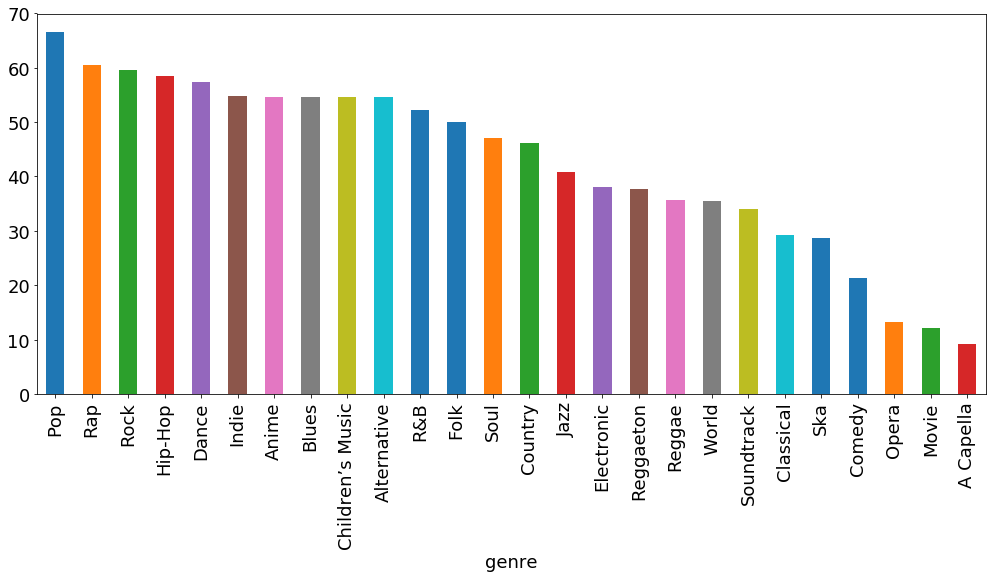

In [19]:
popularity_means = df.groupby(['genre']).mean().sort_values(by='popularity', ascending=False)
popularity_means['genre'] = popularity_means.index
popularity_means = popularity_means['popularity']
popularity_means.plot.bar()


This graph shows that there is a general decline in mean popularity across genres, suggesting that popularity could be used to help predict a song genre. However popularity is not an acoustic quality, so we cannot use popularity as a means to predict song genre.

#### Bar Chart of Average Danceability Across Genres

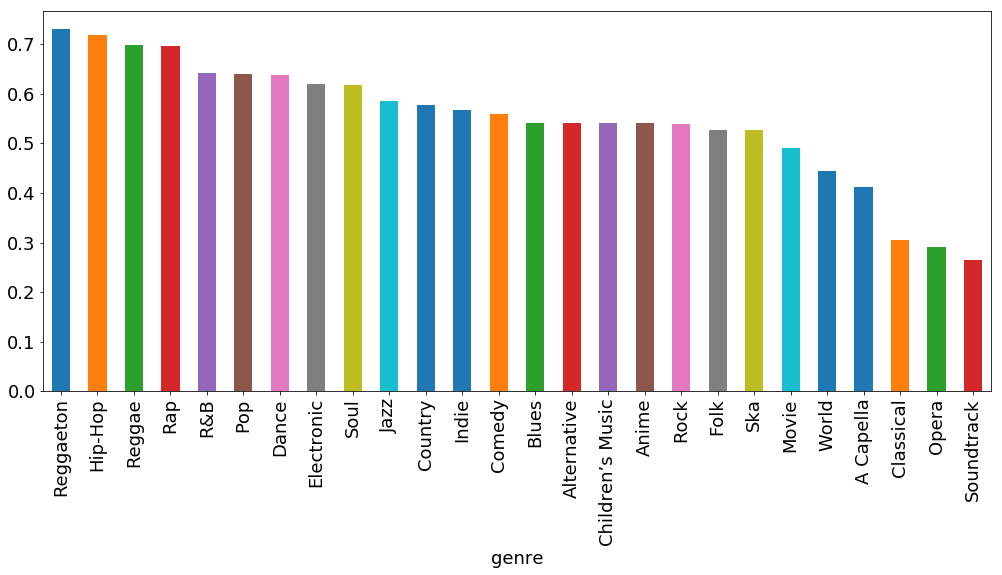

In [20]:
danceability_means = df.groupby(['genre']).mean().sort_values(by='danceability', ascending=False)
danceability_means['genre'] = danceability_means.index
danceability_means = danceability_means['danceability']
danceability_means.plot.bar()

This graph shows that there is a general decline in mean danceability across genres, suggesting that danceability could be used to help predict a song genre. Here we can see that Reggaeton has the highest danceability compared to Soundtrack which has the lowest danceability.

#### Bar Chart of Average Instrumentalness Across Genres

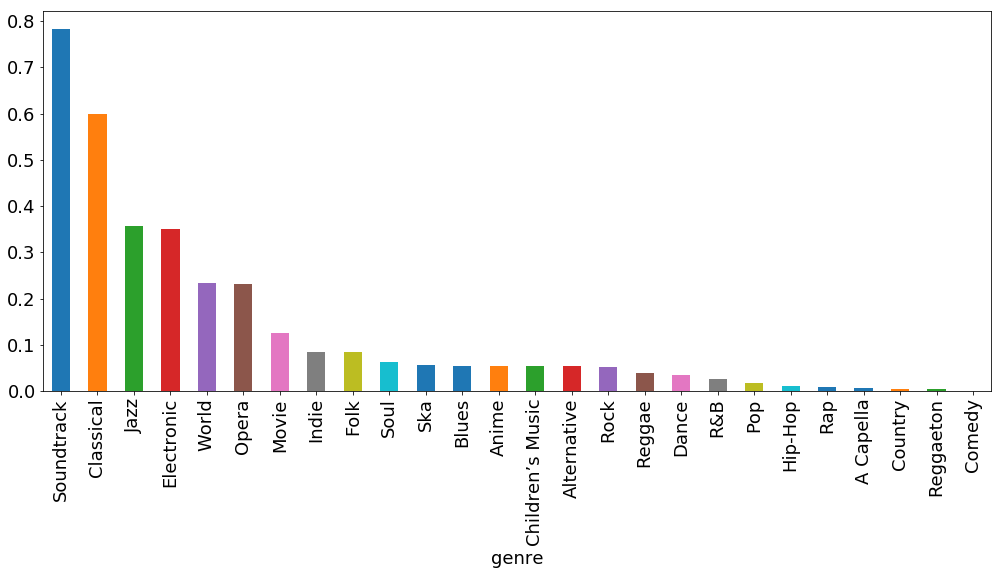

In [21]:
instrumentalness_means = df.groupby(['genre']).mean().sort_values(by='instrumentalness', ascending=False)
instrumentalness_means['genre'] = instrumentalness_means.index
instrumentalness_means = instrumentalness_means['instrumentalness']
instrumentalness_means.plot.bar()

From this graph we can see that there is a decline in average instrumentalness across the genres. This graph shows that the Soundtrack and Classical genres have significantly higher average instrumentalness than the majority of other genres. It may be possible to use instrumentalness to predict song genre.

#### Bar Chart of Average Liveness Across Genres

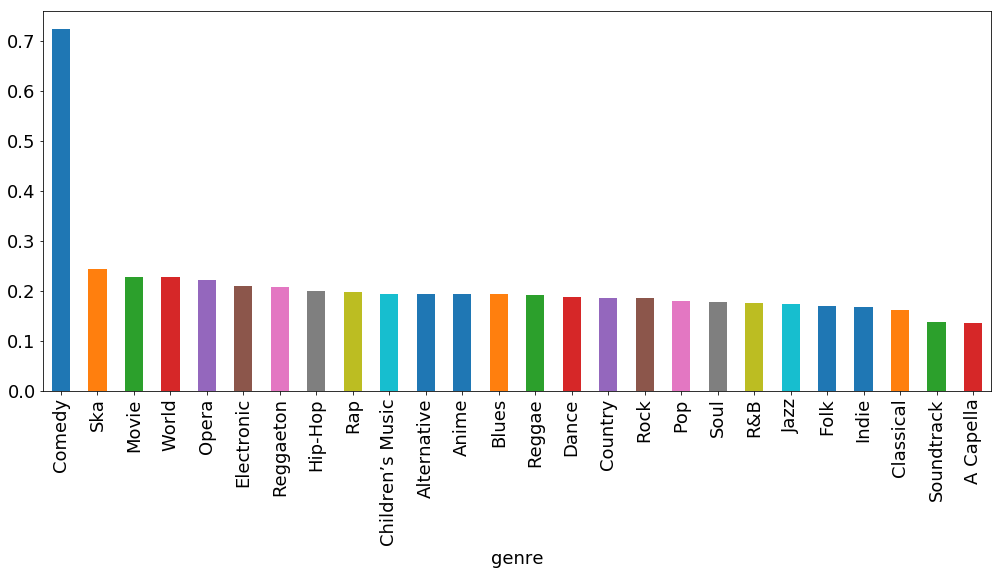

In [22]:
liveness_means = df.groupby(['genre']).mean().sort_values(by='liveness', ascending=False)
liveness_means['genre'] = liveness_means.index
liveness_means = liveness_means['liveness']
liveness_means.plot.bar()

This bar chart tells us that Comedy has the highest liveness out of the genres, while the remaining genres have about the same liveness. From this we can say that liveness has low potential in being able to predict song genre.

#### Bar Chart of Average Loudness Across Genres

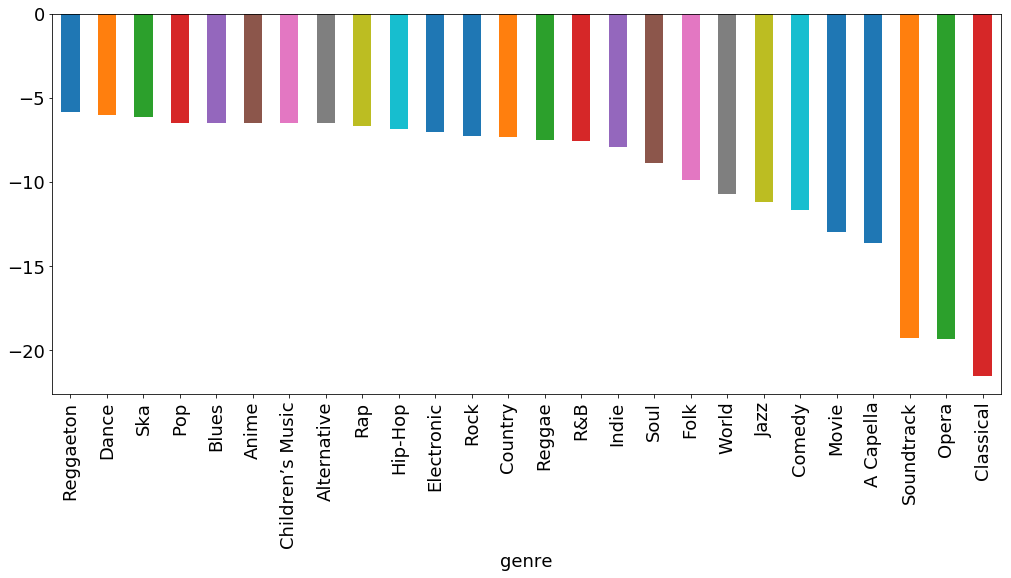

In [23]:
loudness_means = df.groupby(['genre']).mean().sort_values(by='loudness', ascending=False)
loudness_means['genre'] = loudness_means.index
loudness_means = loudness_means['loudness']
loudness_means.plot.bar()

This graph shows that there is a general decline in mean loudness across genres, suggesting that loudness could be used to help predict a song genre. Here we can see that Reggaeton has the highest loudness compared to Classical which has the lowest loudness.

#### Bar Chart of Average Tempo Across Genres

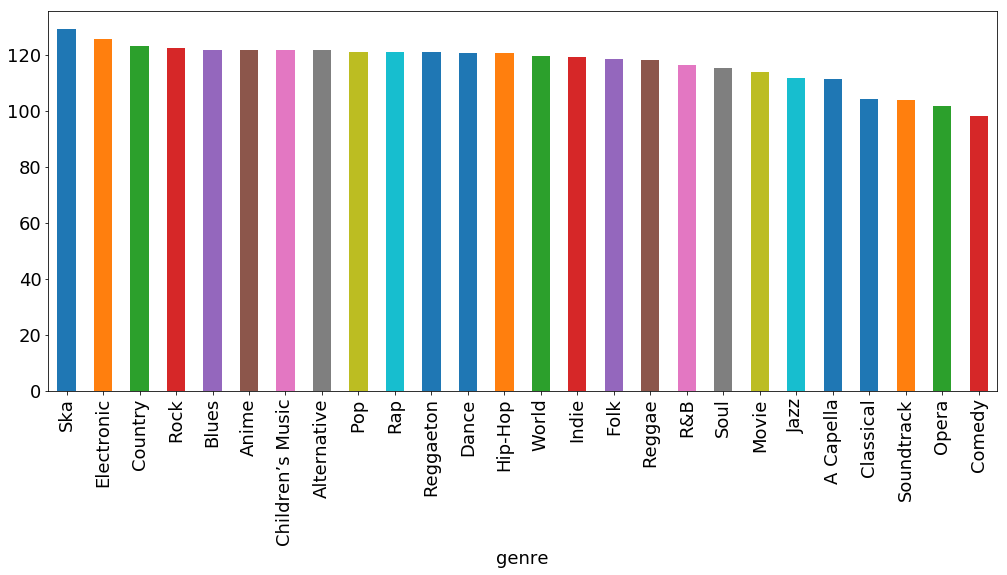

In [24]:
# Plot average tempo across genres
tempo_means = df.groupby(['genre']).mean().sort_values(by='tempo', ascending=False)
tempo_means['genre'] = tempo_means.index
tempo_means = tempo_means['tempo']
tempo_means.plot.bar()

This graph shows that there is a general decline in mean tempo across genre, however the averages are the same between the genres of Blues to Hip Hop, so tempo may not be viable to use when trying to predict song genre.

#### Bar Chart of Average Acousticness Across Genres

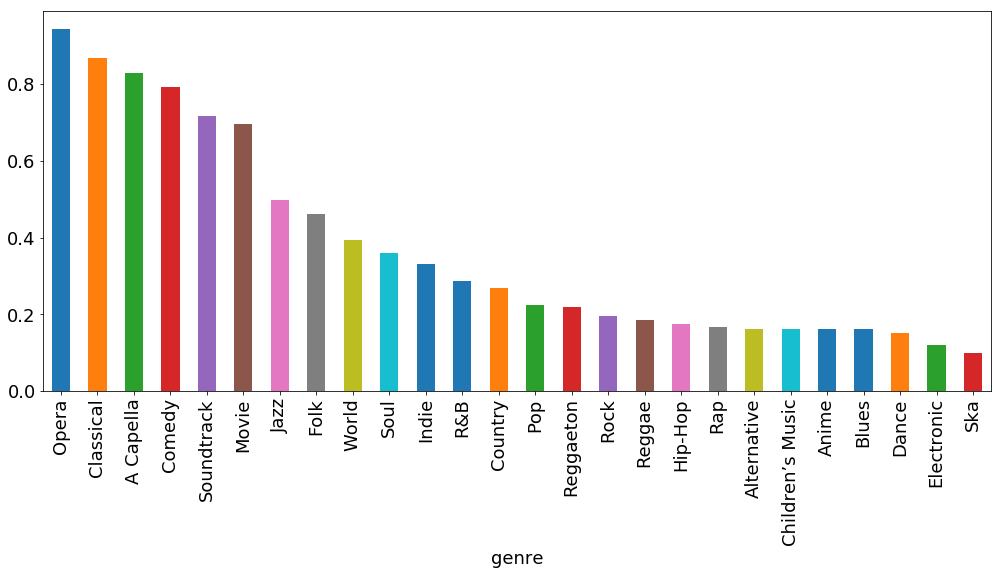

In [25]:
accoustic_means = df.groupby(['genre']).mean().sort_values(by='acousticness', ascending=False)
accoustic_means['genre'] = accoustic_means.index
acc_means=accoustic_means['acousticness']
acc_means.plot.bar()


From this graph we can see that there is a decline in average acousticness across the genres. Because of this it may be possible to use instrumentalness to predict song genre. Here we can see Opera has the highest acousticness, while Ska has the lowest acousticness.

#### Bar Chart of Average Valence Across Genres

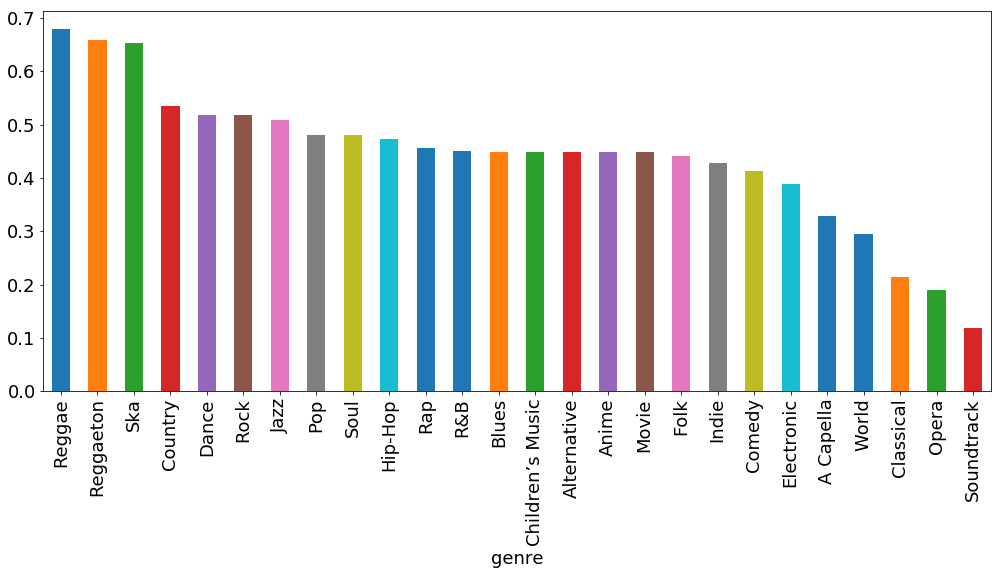

In [26]:
# Plot average valence across genres
valence_means = df.groupby(['genre']).mean().sort_values(by='valence', ascending=False)
valence_means['genre']=valence_means.index
val_means=valence_means['valence']
val_means.plot.bar()

This graph shows that there is a general decline in mean valence across genre, however the averages are the same between the genres of Rap to Movie, so valence may not be viable to use when trying to predict song genre.

#### Bar Chart of Average Speechiness Across Genres

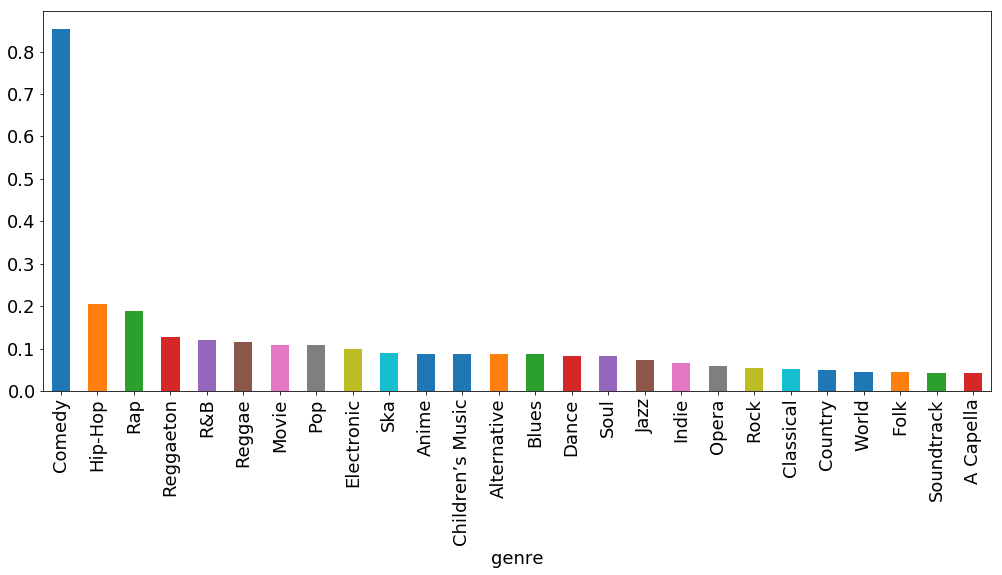

In [27]:
speechiness_means = df.groupby(['genre']).mean().sort_values(by='speechiness', ascending=False)
speechiness_means['genre']=speechiness_means.index
speech_means=speechiness_means['speechiness']
speech_means.plot.bar()

This bar chart tells us that Comedy has the highest speechiness out of the genres, while the remaining genres have about the same speechiness. From this we can say that speechiness has low potential in being able to predict song genre.

#### Bar Chart of Average Duration Across Genres

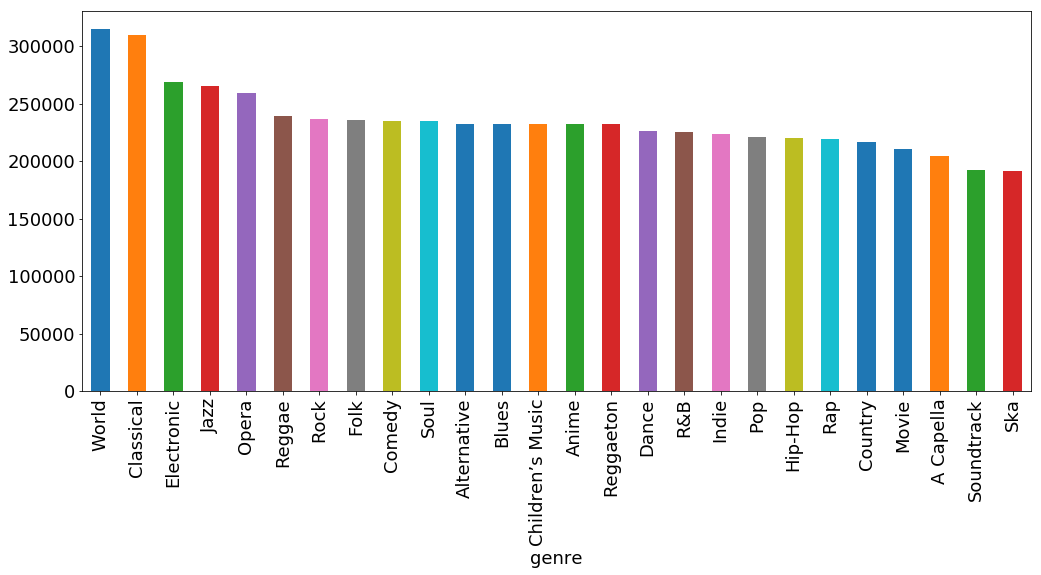

In [28]:
duration_means = df.groupby(['genre']).mean().sort_values(by='duration_ms', ascending=False)
duration_means['genre']=duration_means.index
dur_means=duration_means['duration_ms']
dur_means.plot.bar()

This graph shows that there is a general decline in mean duration across genre, however the averages are the same between the genres of Soul to Reggaeton, so duration may not be viable to use when trying to predict song genre.

#### Bar Chart of Average Energy Across Genres

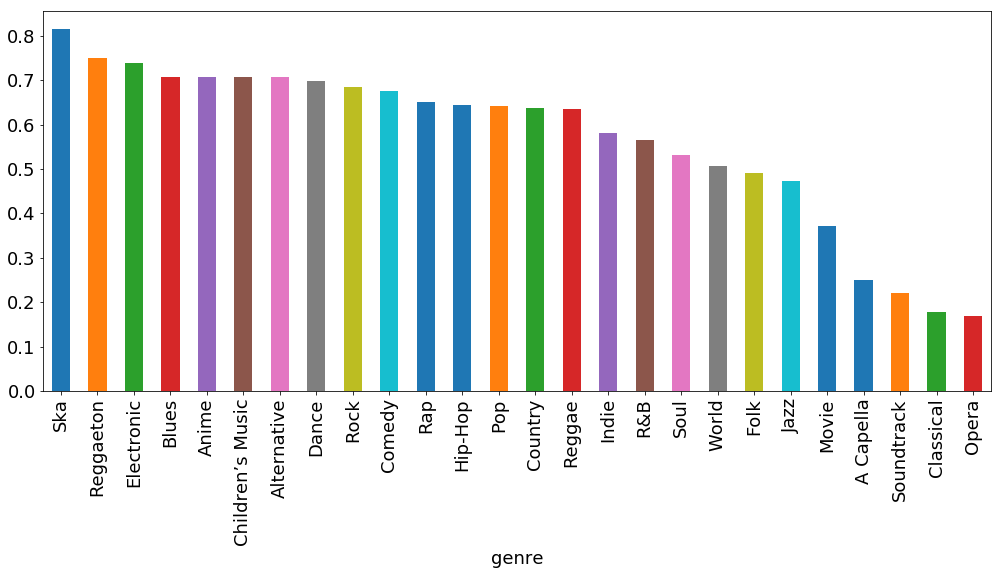

In [29]:
energy_means = df.groupby(['genre']).mean().sort_values(by='energy', ascending=False)
energy_means['genre']=energy_means.index
en_means=energy_means['energy']
en_means.plot.bar()

This graph shows that there is a general decline in mean energy across genre, however the averages are the same between the genres of Blues to Alternative and between Pop to Reggae, so duration may not be viable to use when trying to predict song genre.

### Analysis of Bar Charts of Mean Values of Attributes Across Genres

After plotting the mean values of all attributes across genres we can spot trends between genres. Plots where the average value for an attribute across genres could be used to determine a song's genre, but only if every mean is unique from one another.

From this we have determined that the following attributes have potential for predicting genre: danceability, loudness, acousticness, energy, and instrumentalness. Though we included tempo in our hypothesis, after this portion of exploratory data analysis we determined that tempo is not useful in predicting song genre.

To further test if the above attributes are viable to use to determine a song's genre, we must look closer at their values and distributions.

### Distribution Plots of All Attributes Across Genres

Below we plot the distributions for all attributes across the population. We do this so we can visualize their distributions and determine if they are normal or not.

#### Distribution Plot of All Attributes with Scale from 0.0 to 1.0 in the Population

Text(0.5, 1.0, 'Distribution of Attributes for All Songs')

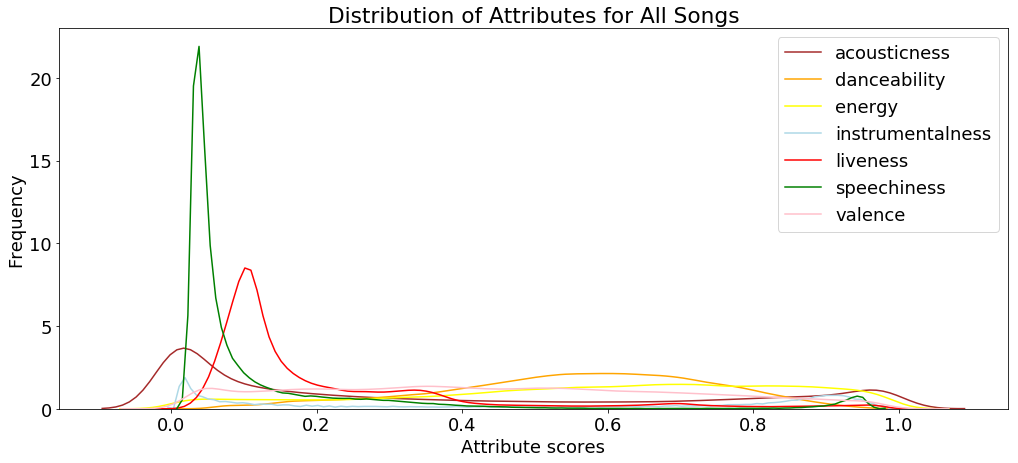

In [30]:
line1 = sns.distplot(df[['acousticness']], bins = 25, hist=False, rug=False, label = 'acousticness', color= 'brown' )
line2 = sns.distplot(df[['danceability']], bins = 25,  hist=False, rug=False, label = 'danceability',color = 'orange')
line3 = sns.distplot(df[['energy']], hist=False, bins = 25,  rug=False, label = 'energy', color = 'yellow')
line4 = sns.distplot(df[['instrumentalness']], bins = 25,  hist=False, rug=False,label = 'instrumentalness', color = 'lightblue')
line5 = sns.distplot(df[['liveness']], bins = 25,  hist=False, rug=False, label = 'liveness', color = 'red')
line6 = sns.distplot(df[['speechiness']], bins = 25,  hist=False, rug=False, label = 'speechiness', color = 'green')
line7 = sns.distplot(df[['valence']], hist=False, bins = 25,  rug=False, label = 'valence',  color = 'pink')

plt.xlabel('Attribute scores')
plt.ylabel('Frequency')
plt.title('Distribution of Attributes for All Songs')

#### Distribution Plot of Loudness in the Population

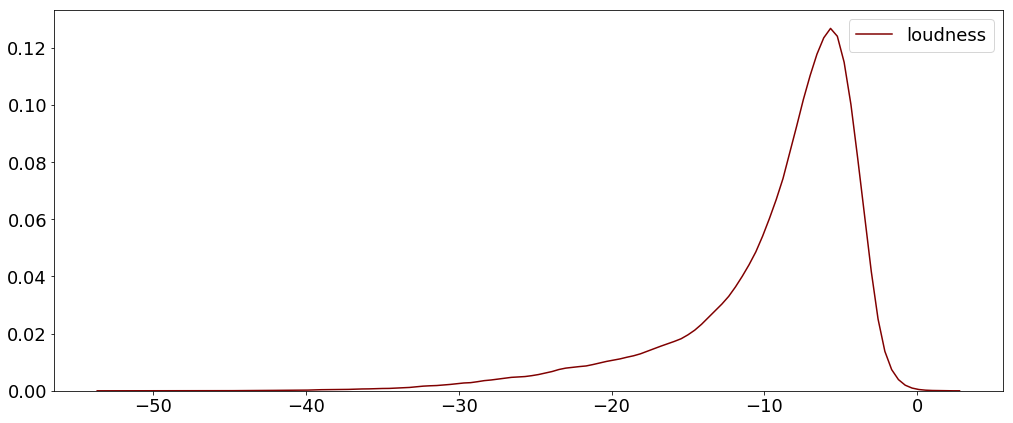

In [31]:
sns.distplot(df[['loudness']], bins = 25, hist=False, rug=False, label = 'loudness', color= 'maroon' )

#### Distribution Plot of Tempo in the Population

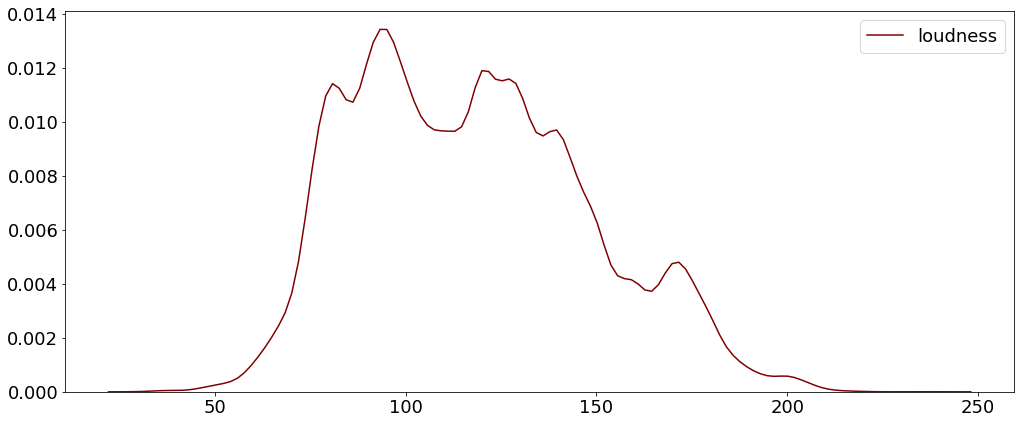

In [32]:
sns.distplot(df[['tempo']], bins = 25, hist=False, rug=False, label = 'loudness', color= 'maroon' )

#### Check If Distributions For Attributes Are Normal

In [33]:
#Checks if the distribution of the "popularity" attribute is normal
k2_pop, p = stats.normaltest(df['popularity'])
alpha = 0.05

if p < alpha:  # null hypothesis: The distribution of the popularity attribute is normal
    print("The null hypothesis that 'The distribution of the popularity attribute is normal'  can be rejected")
else:
    print("The null hypothesis that 'The distribution of the popularity attribute is normal' cannot be rejected")

#Checks if the distribution of the "danceability" attribute is normal
k2, p = stats.normaltest(df['danceability'])
alpha = 0.05

if p < alpha:  # null hypothesis: The distribution of the danceability attribute is normal
    print("The null hypothesis that 'The distribution of the danceability attribute is normal'  can be rejected")
else:
    print("The null hypothesis that 'The distribution of the danceability attribute is normal' cannot be rejected")

#Checks if the distribution of the "instrumentalness" attribute is normal
k2, p = stats.normaltest(df['instrumentalness'])
alpha = 0.05

if p < alpha:  # null hypothesis: The distribution of the instrumentalness attribute is normal
    print("The null hypothesis that 'The distribution of the instrumentalness attribute is normal'  can be rejected")
else:
    print("The null hypothesis that 'The distribution of the instrumentalness attribute is normal' cannot be rejected")
    
#Checks if the distribution of the "liveness" attribute is normal
k2, p = stats.normaltest(df['liveness'])
alpha = 0.05

if p < alpha:  # null hypothesis: The distribution of the liveness attribute is normal
    print("The null hypothesis that 'The distribution of the liveness attribute is normal'  can be rejected")
else:
    print("The null hypothesis that 'The distribution of the liveness attribute is normal' cannot be rejected")
    
#Checks if the distribution of the "liveness" attribute is normal
k2, p = stats.normaltest(df['loudness'])
alpha = 0.05

if p < alpha:  # null hypothesis: The distribution of the loudness attribute is normal
    print("The null hypothesis that 'The distribution of the loudness attribute is normal'  can be rejected")
else:
    print("The null hypothesis that 'The distribution of the loudness attribute is normal' cannot be rejected")
    
#Checks if the distribution of the "speechiness" attribute is normal
k2, p = stats.normaltest(df['speechiness'])
alpha = 0.05

if p < alpha:  # null hypothesis: The distribution of the speechiness attribute is normal
    print("The null hypothesis that 'The distribution of the speechiness attribute is normal'  can be rejected")
else:
    print("The null hypothesis that 'The distribution of the speechiness attribute is normal' cannot be rejected")
    
#Checks if the distribution of the "valence" attribute is normal
k2, p = stats.normaltest(df['valence'])
alpha = 0.05

if p < alpha:  # null hypothesis: The distribution of the valence attribute is normal
    print("The null hypothesis that 'The distribution of the valence attribute is normal'  can be rejected")
else:
    print("The null hypothesis that 'The distribution of the valence attribute is normal' cannot be rejected")

#Checks if the distribution of the "tempo" attribute is normal
k2, p = stats.normaltest(df['tempo'])
alpha = 0.05

if p < alpha:  # null hypothesis: The distribution of the tempo attribute is normal
    print("The null hypothesis that 'The distribution of the tempo attribute is normal'  can be rejected")
else:
    print("The null hypothesis that 'The distribution of the tempo attribute is normal' cannot be rejected")

#Checks if the distribution of the "tempo" attribute is normal
k2, p = stats.normaltest(df['tempo'])
alpha = 0.05

if p < alpha:  # null hypothesis: The distribution of the acousticness attribute is normal
    print("The null hypothesis that 'The distribution of the acousticness attribute is normal'  can be rejected")
else:
    print("The null hypothesis that 'The distribution of the acousticness attribute is normal' cannot be rejected")

    

The null hypothesis that 'The distribution of the popularity attribute is normal'  can be rejected
The null hypothesis that 'The distribution of the danceability attribute is normal'  can be rejected
The null hypothesis that 'The distribution of the instrumentalness attribute is normal'  can be rejected
The null hypothesis that 'The distribution of the liveness attribute is normal'  can be rejected
The null hypothesis that 'The distribution of the loudness attribute is normal'  can be rejected
The null hypothesis that 'The distribution of the speechiness attribute is normal'  can be rejected
The null hypothesis that 'The distribution of the valence attribute is normal'  can be rejected
The null hypothesis that 'The distribution of the tempo attribute is normal'  can be rejected
The null hypothesis that 'The distribution of the acousticness attribute is normal'  can be rejected


From these assertions we know that none of the distributions for any of the attributes across the genres are normal. This is because we reject the null hypothesis that the distribution is normal. Now that we know this, we can plot the distribution plots of the five attributes that we think have the ability to predict song genre (acousticness, danceability, loudness, energy).

### Distribution Plots of All Attributes Across Genres


In the last section we determined which attributes have potential in predicting song genre by graphing the mean values of each attribute across all of the genres. We cannot assume that these attributes are correct in being able to predict song genre with only the mean, so we need to look at their distributions between genres.

#### Distribution Plot of Acousticness of All Songs in Each Genre

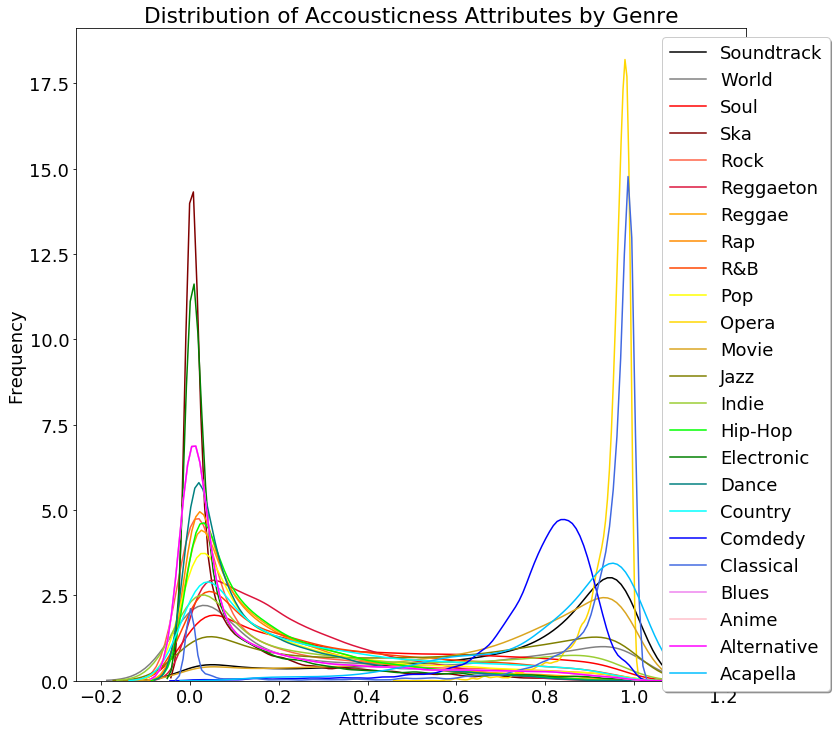

In [34]:
sns.distplot(df_Soundtrack[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Soundtrack', color= 'black' )
sns.distplot(df_World[['acousticness']], bins = 25,   hist=False, rug=False, label = 'World', color= 'grey' )
sns.distplot(df_Soul[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Soul', color= 'red' )
sns.distplot(df_Ska[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Ska', color= 'maroon' )
sns.distplot(df_Rock[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Rock', color= 'tomato' )
sns.distplot(df_Reggaeton[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Reggaeton', color= 'crimson' )
sns.distplot(df_Reggae[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Reggae', color= 'orange' )
sns.distplot(df_Rap[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Rap', color= 'darkorange' )
sns.distplot(df_RandB[['acousticness']], bins = 25,   hist=False, rug=False, label = 'R&B', color= 'orangered' )
sns.distplot(df_Pop[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Pop', color= 'yellow' )
sns.distplot(df_Opera[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Opera', color= 'gold' )
sns.distplot(df_Movie[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Movie', color= 'goldenrod' )
sns.distplot(df_Jazz [['acousticness']], bins = 25,   hist=False, rug=False, label = 'Jazz ', color= 'olive' )
sns.distplot(df_Indie[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Indie', color= 'yellowgreen' )
sns.distplot(df_HipHop[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Hip-Hop', color= 'lime' )
sns.distplot(df_Electronic[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Electronic', color= 'green' )
sns.distplot(df_Dance[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Dance', color= 'teal' )
sns.distplot(df_Country[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Country', color= 'cyan' )
sns.distplot(df_Comdedy[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Comdedy', color= 'blue' )
sns.distplot(df_Classical[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Classical', color= 'royalblue' )
sns.distplot(df_ChildrensMusic[['acousticness']], bins = 25,   hist=False, rug=False, label = "Children's Music", color= 'indigo' )
sns.distplot(df_Blues[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Blues', color= 'violet' )
sns.distplot(df_Anime[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Anime ', color= 'pink' )
sns.distplot(df_Alternative[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Alternative', color= 'magenta' )
sns.distplot(df_Acapella[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Acapella', color= 'deepskyblue' )


plt.xlabel('Attribute scores')
plt.ylabel('Frequency')
plt.title('Distribution of Accousticness Attributes by Genre')
plt.legend(loc='upper center', bbox_to_anchor=(1, 1), shadow=True, ncol=1)
fig = plt.gcf()
fig.set_size_inches(12,12)


From this plot we can see that the distributions of acousticness are not similar. The attributes have different frequencies across genres which indicates that their differences are signficant enough to differentiate from one another. 

We determine that acousticness can be used to predict song genre.

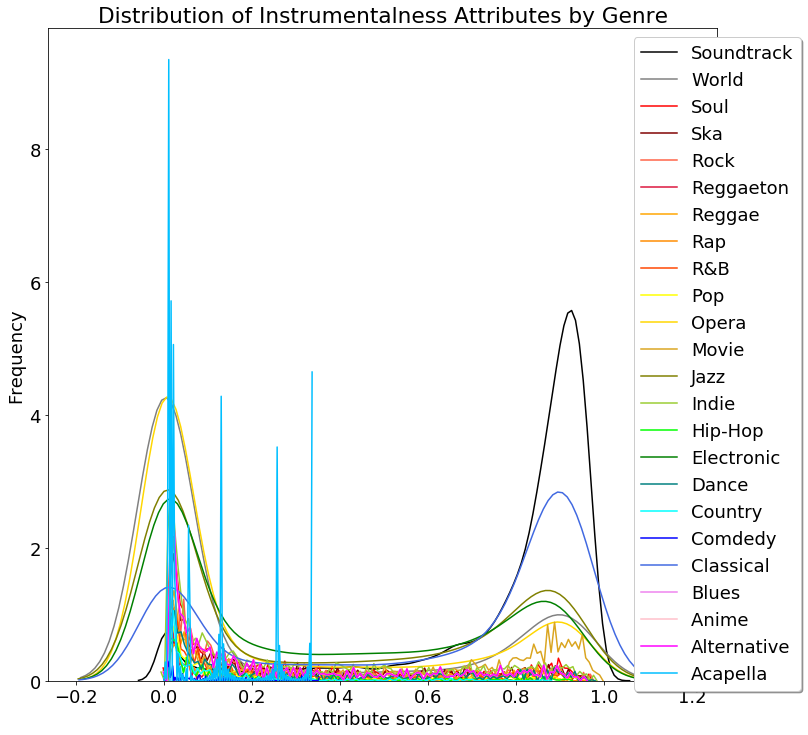

In [35]:
#plots the distribution of the instrumentalness attributes of all songs in each Genre

sns.distplot(df_Soundtrack[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Soundtrack', color= 'black' )
sns.distplot(df_World[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'World', color= 'grey' )
sns.distplot(df_Soul[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Soul', color= 'red' )
sns.distplot(df_Ska[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Ska', color= 'maroon' )
sns.distplot(df_Rock[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Rock', color= 'tomato' )
sns.distplot(df_Reggaeton[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Reggaeton', color= 'crimson' )
sns.distplot(df_Reggae[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Reggae', color= 'orange' )
sns.distplot(df_Rap[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Rap', color= 'darkorange' )
sns.distplot(df_RandB[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'R&B', color= 'orangered' )
sns.distplot(df_Pop[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Pop', color= 'yellow' )
sns.distplot(df_Opera[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Opera', color= 'gold' )
sns.distplot(df_Movie[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Movie', color= 'goldenrod' )
sns.distplot(df_Jazz [['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Jazz ', color= 'olive' )
sns.distplot(df_Indie[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Indie', color= 'yellowgreen' )
sns.distplot(df_HipHop[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Hip-Hop', color= 'lime' )
sns.distplot(df_Electronic[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Electronic', color= 'green' )
sns.distplot(df_Dance[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Dance', color= 'teal' )
sns.distplot(df_Country[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Country', color= 'cyan' )
sns.distplot(df_Comdedy[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Comdedy', color= 'blue' )
sns.distplot(df_Classical[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Classical', color= 'royalblue' )
sns.distplot(df_ChildrensMusic[['instrumentalness']], bins = 25,   hist=False, rug=False, label = "Children's Music", color= 'indigo' )
sns.distplot(df_Blues[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Blues', color= 'violet' )
sns.distplot(df_Anime[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Anime ', color= 'pink' )
sns.distplot(df_Alternative[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Alternative', color= 'magenta' )
sns.distplot(df_Acapella[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Acapella', color= 'deepskyblue' )


plt.xlabel('Attribute scores')
plt.ylabel('Frequency')
plt.title('Distribution of Instrumentalness Attributes by Genre')
plt.legend(loc='upper center', bbox_to_anchor=(1, 1), shadow=True, ncol=1)
fig = plt.gcf()
fig.set_size_inches(12,12)


In this graph we can also see that the distributions of instrumentalness are not similar. The attributes' frequencies and distributions vary greatly across genres which indicates that their differences are signficant enough to differentiate from one another. 

We determine that acousticness can be used to predict song genre.

#### Distribution Plot of Danceability of All Songs in Each Genre

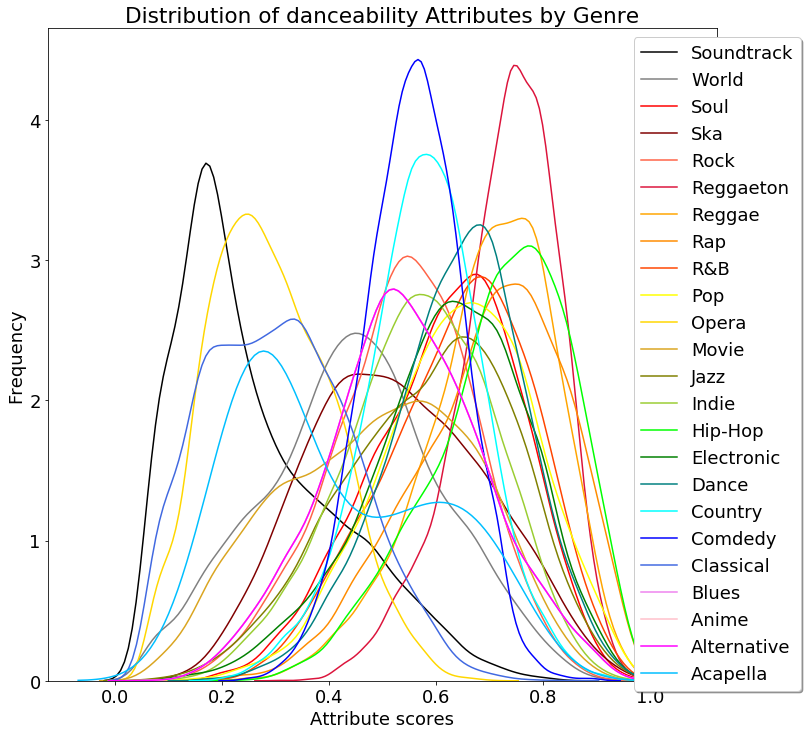

In [36]:
sns.distplot(df_Soundtrack[['danceability']], bins = 25,   hist=False, rug=False, label = 'Soundtrack', color= 'black' )
sns.distplot(df_World[['danceability']], bins = 25,   hist=False, rug=False, label = 'World', color= 'grey' )
sns.distplot(df_Soul[['danceability']], bins = 25,   hist=False, rug=False, label = 'Soul', color= 'red' )
sns.distplot(df_Ska[['danceability']], bins = 25,   hist=False, rug=False, label = 'Ska', color= 'maroon' )
sns.distplot(df_Rock[['danceability']], bins = 25,   hist=False, rug=False, label = 'Rock', color= 'tomato' )
sns.distplot(df_Reggaeton[['danceability']], bins = 25,   hist=False, rug=False, label = 'Reggaeton', color= 'crimson' )
sns.distplot(df_Reggae[['danceability']], bins = 25,   hist=False, rug=False, label = 'Reggae', color= 'orange' )
sns.distplot(df_Rap[['danceability']], bins = 25,   hist=False, rug=False, label = 'Rap', color= 'darkorange' )
sns.distplot(df_RandB[['danceability']], bins = 25,   hist=False, rug=False, label = 'R&B', color= 'orangered' )
sns.distplot(df_Pop[['danceability']], bins = 25,   hist=False, rug=False, label = 'Pop', color= 'yellow' )
sns.distplot(df_Opera[['danceability']], bins = 25,   hist=False, rug=False, label = 'Opera', color= 'gold' )
sns.distplot(df_Movie[['danceability']], bins = 25,   hist=False, rug=False, label = 'Movie', color= 'goldenrod' )
sns.distplot(df_Jazz [['danceability']], bins = 25,   hist=False, rug=False, label = 'Jazz ', color= 'olive' )
sns.distplot(df_Indie[['danceability']], bins = 25,   hist=False, rug=False, label = 'Indie', color= 'yellowgreen' )
sns.distplot(df_HipHop[['danceability']], bins = 25,   hist=False, rug=False, label = 'Hip-Hop', color= 'lime' )
sns.distplot(df_Electronic[['danceability']], bins = 25,   hist=False, rug=False, label = 'Electronic', color= 'green' )
sns.distplot(df_Dance[['danceability']], bins = 25,   hist=False, rug=False, label = 'Dance', color= 'teal' )
sns.distplot(df_Country[['danceability']], bins = 25,   hist=False, rug=False, label = 'Country', color= 'cyan' )
sns.distplot(df_Comdedy[['danceability']], bins = 25,   hist=False, rug=False, label = 'Comdedy', color= 'blue' )
sns.distplot(df_Classical[['danceability']], bins = 25,   hist=False, rug=False, label = 'Classical', color= 'royalblue' )
sns.distplot(df_ChildrensMusic[['danceability']], bins = 25,   hist=False, rug=False, label = "Children's Music", color= 'indigo' )
sns.distplot(df_Blues[['danceability']], bins = 25,   hist=False, rug=False, label = 'Blues', color= 'violet' )
sns.distplot(df_Anime[['danceability']], bins = 25,   hist=False, rug=False, label = 'Anime ', color= 'pink' )
sns.distplot(df_Alternative[['danceability']], bins = 25,   hist=False, rug=False, label = 'Alternative', color= 'magenta' )
sns.distplot(df_Acapella[['danceability']], bins = 25,   hist=False, rug=False, label = 'Acapella', color= 'deepskyblue' )


plt.xlabel('Attribute scores')
plt.ylabel('Frequency')
plt.title('Distribution of danceability Attributes by Genre')
plt.legend(loc='upper center', bbox_to_anchor=(1, 1), shadow=True, ncol=1)
fig = plt.gcf()
fig.set_size_inches(12,12)


In this graph we can also see that the distributions of danceability are not similar. The attributes' frequencies and distributions vary greatly across genres which indicates that their differences are signficant enough to differentiate from one another. 

We determine that danceability can be used to predict song genre.

#### Distribution Plot of Energy of All Songs in Each Genre

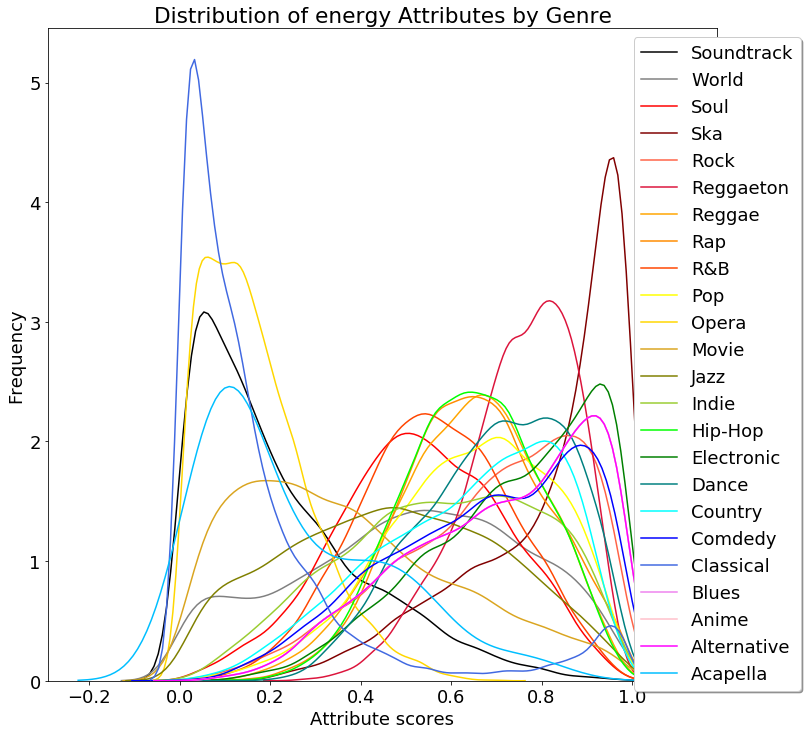

In [37]:
sns.distplot(df_Soundtrack[['energy']], bins = 25,   hist=False, rug=False, label = 'Soundtrack', color= 'black' )
sns.distplot(df_World[['energy']], bins = 25,   hist=False, rug=False, label = 'World', color= 'grey' )
sns.distplot(df_Soul[['energy']], bins = 25,   hist=False, rug=False, label = 'Soul', color= 'red' )
sns.distplot(df_Ska[['energy']], bins = 25,   hist=False, rug=False, label = 'Ska', color= 'maroon' )
sns.distplot(df_Rock[['energy']], bins = 25,   hist=False, rug=False, label = 'Rock', color= 'tomato' )
sns.distplot(df_Reggaeton[['energy']], bins = 25,   hist=False, rug=False, label = 'Reggaeton', color= 'crimson' )
sns.distplot(df_Reggae[['energy']], bins = 25,   hist=False, rug=False, label = 'Reggae', color= 'orange' )
sns.distplot(df_Rap[['energy']], bins = 25,   hist=False, rug=False, label = 'Rap', color= 'darkorange' )
sns.distplot(df_RandB[['energy']], bins = 25,   hist=False, rug=False, label = 'R&B', color= 'orangered' )
sns.distplot(df_Pop[['energy']], bins = 25,   hist=False, rug=False, label = 'Pop', color= 'yellow' )
sns.distplot(df_Opera[['energy']], bins = 25,   hist=False, rug=False, label = 'Opera', color= 'gold' )
sns.distplot(df_Movie[['energy']], bins = 25,   hist=False, rug=False, label = 'Movie', color= 'goldenrod' )
sns.distplot(df_Jazz [['energy']], bins = 25,   hist=False, rug=False, label = 'Jazz ', color= 'olive' )
sns.distplot(df_Indie[['energy']], bins = 25,   hist=False, rug=False, label = 'Indie', color= 'yellowgreen' )
sns.distplot(df_HipHop[['energy']], bins = 25,   hist=False, rug=False, label = 'Hip-Hop', color= 'lime' )
sns.distplot(df_Electronic[['energy']], bins = 25,   hist=False, rug=False, label = 'Electronic', color= 'green' )
sns.distplot(df_Dance[['energy']], bins = 25,   hist=False, rug=False, label = 'Dance', color= 'teal' )
sns.distplot(df_Country[['energy']], bins = 25,   hist=False, rug=False, label = 'Country', color= 'cyan' )
sns.distplot(df_Comdedy[['energy']], bins = 25,   hist=False, rug=False, label = 'Comdedy', color= 'blue' )
sns.distplot(df_Classical[['energy']], bins = 25,   hist=False, rug=False, label = 'Classical', color= 'royalblue' )
sns.distplot(df_ChildrensMusic[['energy']], bins = 25,   hist=False, rug=False, label = "Children's Music", color= 'indigo' )
sns.distplot(df_Blues[['energy']], bins = 25,   hist=False, rug=False, label = 'Blues', color= 'violet' )
sns.distplot(df_Anime[['energy']], bins = 25,   hist=False, rug=False, label = 'Anime ', color= 'pink' )
sns.distplot(df_Alternative[['energy']], bins = 25,   hist=False, rug=False, label = 'Alternative', color= 'magenta' )
sns.distplot(df_Acapella[['energy']], bins = 25,   hist=False, rug=False, label = 'Acapella', color= 'deepskyblue' )


plt.xlabel('Attribute scores')
plt.ylabel('Frequency')
plt.title('Distribution of energy Attributes by Genre')
plt.legend(loc='upper center', bbox_to_anchor=(1, 1), shadow=True, ncol=1)
fig = plt.gcf()
fig.set_size_inches(12,12)


In this graph we can also see that the distributions of energy are not similar. The attributes' frequencies and distributions vary greatly across genres which indicates that their differences are signficant enough to differentiate from one another. 

We determine that energy can be used to predict song genre.

#### Distribution Plot of Loudness of All Songs in Each Genre

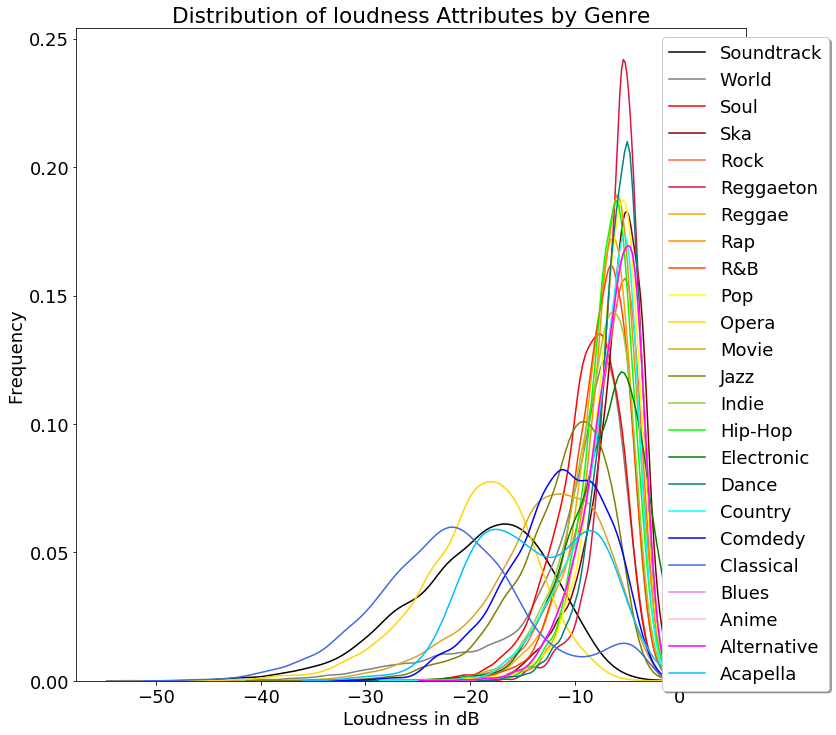

In [38]:
sns.distplot(df_Soundtrack[['loudness']], bins = 25,   hist=False, rug=False, label = 'Soundtrack', color= 'black' )
sns.distplot(df_World[['loudness']], bins = 25,   hist=False, rug=False, label = 'World', color= 'grey' )
sns.distplot(df_Soul[['loudness']], bins = 25,   hist=False, rug=False, label = 'Soul', color= 'red' )
sns.distplot(df_Ska[['loudness']], bins = 25,   hist=False, rug=False, label = 'Ska', color= 'maroon' )
sns.distplot(df_Rock[['loudness']], bins = 25,   hist=False, rug=False, label = 'Rock', color= 'tomato' )
sns.distplot(df_Reggaeton[['loudness']], bins = 25,   hist=False, rug=False, label = 'Reggaeton', color= 'crimson' )
sns.distplot(df_Reggae[['loudness']], bins = 25,   hist=False, rug=False, label = 'Reggae', color= 'orange' )
sns.distplot(df_Rap[['loudness']], bins = 25,   hist=False, rug=False, label = 'Rap', color= 'darkorange' )
sns.distplot(df_RandB[['loudness']], bins = 25,   hist=False, rug=False, label = 'R&B', color= 'orangered' )
sns.distplot(df_Pop[['loudness']], bins = 25,   hist=False, rug=False, label = 'Pop', color= 'yellow' )
sns.distplot(df_Opera[['loudness']], bins = 25,   hist=False, rug=False, label = 'Opera', color= 'gold' )
sns.distplot(df_Movie[['loudness']], bins = 25,   hist=False, rug=False, label = 'Movie', color= 'goldenrod' )
sns.distplot(df_Jazz [['loudness']], bins = 25,   hist=False, rug=False, label = 'Jazz ', color= 'olive' )
sns.distplot(df_Indie[['loudness']], bins = 25,   hist=False, rug=False, label = 'Indie', color= 'yellowgreen' )
sns.distplot(df_HipHop[['loudness']], bins = 25,   hist=False, rug=False, label = 'Hip-Hop', color= 'lime' )
sns.distplot(df_Electronic[['loudness']], bins = 25,   hist=False, rug=False, label = 'Electronic', color= 'green' )
sns.distplot(df_Dance[['loudness']], bins = 25,   hist=False, rug=False, label = 'Dance', color= 'teal' )
sns.distplot(df_Country[['loudness']], bins = 25,   hist=False, rug=False, label = 'Country', color= 'cyan' )
sns.distplot(df_Comdedy[['loudness']], bins = 25,   hist=False, rug=False, label = 'Comdedy', color= 'blue' )
sns.distplot(df_Classical[['loudness']], bins = 25,   hist=False, rug=False, label = 'Classical', color= 'royalblue' )
sns.distplot(df_ChildrensMusic[['loudness']], bins = 25,   hist=False, rug=False, label = "Children's Music", color= 'indigo' )
sns.distplot(df_Blues[['loudness']], bins = 25,   hist=False, rug=False, label = 'Blues', color= 'violet' )
sns.distplot(df_Anime[['loudness']], bins = 25,   hist=False, rug=False, label = 'Anime ', color= 'pink' )
sns.distplot(df_Alternative[['loudness']], bins = 25,   hist=False, rug=False, label = 'Alternative', color= 'magenta' )
sns.distplot(df_Acapella[['loudness']], bins = 25,   hist=False, rug=False, label = 'Acapella', color= 'deepskyblue' )


plt.xlabel('Loudness in dB')
plt.ylabel('Frequency')
plt.title('Distribution of loudness Attributes by Genre')
plt.legend(loc='upper center', bbox_to_anchor=(1, 1), shadow=True, ncol=1)
fig = plt.gcf()
fig.set_size_inches(12,12)


In this graph we can also see that the distributions of loudness are similar. The attributes' frequencies take the same shape and overlap around -5dB. Because of this there is not enough significant difference between the distributions of each genre.

We determine that loudness cannot be used to predict song genre.

### Analysis of Bar Charts of Mean Values of Attributes Across Genres

From plotting the distributions of our predicted attributes across genres we have determined that danceability, instrumentalness, acousticness, and energy can be used to determine song genre. This is because their distributions differed between genres, indicating that there is enough variance between genres to create boundaries.

The loudness attribute's distribution was too similar across genres so we assert that loudness cannot be used to determine song genre.

## Analysis

After exploring our data we have narrowed down the audio attributes to four attributes that we believe are capable of predicting a song's genre. These four attributes have different enough distributions such that the trends across each genre are distinct. From here we can attempt building a model that can predict a song's genre using these four attributes: danceability, instrumentalness, acousticness, energy.

### Linear Regression / Correlation

In [39]:
# findng out what attributes are correlated with each other
df.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.422083,0.294233,-0.041150,0.277652,-0.230042,-0.203147,0.413276,-0.194673,0.114957,0.119224
acousticness,-0.422083,1.000000,-0.379441,0.035410,-0.723150,0.323748,0.086149,-0.698187,0.165105,-0.241385,-0.335430
danceability,0.294233,-0.379441,1.000000,-0.116437,0.338110,-0.360938,-0.034043,0.451336,0.135728,0.018950,0.542405
duration_ms,-0.041150,0.035410,-0.116437,1.000000,-0.058045,0.094618,0.006760,-0.068716,-0.017621,-0.027957,-0.135970
energy,0.277652,-0.723150,0.338110,-0.058045,1.000000,-0.388705,0.182697,0.816640,0.141294,0.228067,0.449463
instrumentalness,-0.230042,0.323748,-0.360938,0.094618,-0.388705,1.000000,-0.131840,-0.517373,-0.173734,-0.108424,-0.301990
liveness,-0.203147,0.086149,-0.034043,0.006760,0.182697,-0.131840,1.000000,0.035792,0.519542,-0.055556,0.018264
loudness,0.413276,-0.698187,0.451336,-0.068716,0.816640,-0.517373,0.035792,1.000000,-0.008912,0.229110,0.407057
speechiness,-0.194673,0.165105,0.135728,-0.017621,0.141294,-0.173734,0.519542,-0.008912,1.000000,-0.085619,0.035007
tempo,0.114957,-0.241385,0.018950,-0.027957,0.228067,-0.108424,-0.055556,0.229110,-0.085619,1.000000,0.120573


In [40]:
# multiple linear regression - need to change since we aren't looking at popularity
outcome, predictors = patsy.dmatrices('popularity ~ danceability + energy + tempo', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                 1.105e+04
Date:                Tue, 11 Jun 2019   Prob (F-statistic):               0.00
Time:                        18:35:06   Log-Likelihood:            -9.5837e+05
No. Observations:              228159   AIC:                         1.917e+06
Df Residuals:                  228155   BIC:                         1.917e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       20.5799      0.167    123.183   

If danceability, energy, and tempo were all 0, the Popularity would be 20.58 (intercept).

Holding energy and tempo constant, for every 1 unit increase in Danceability, you expect to see a 21.67 unit increase in Popularity.

Holding danceability and tempo constant, for every 1 unit increase in Energy, you expect to see a 12.20 unit increase in Popularity.

Holding danceability and energy constant, for every 1 unit increase in Tempo, you expect to see a 0.038 unit increase in Popularity.

In [58]:
# testing imports for clustering (check tutorial notebook #15)
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster.vq import whiten

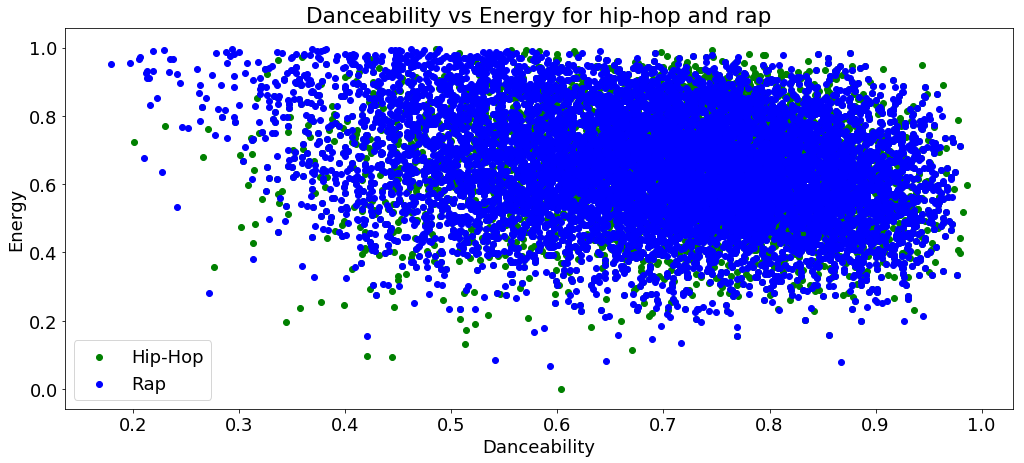

In [59]:
# looking at distinctions of attributes between hip-hop and rap genres
plt.scatter(df.danceability[df.genre=='Hip-Hop'], df.energy[df.genre=='Hip-Hop'],
           c='green', label='Hip-Hop')
plt.scatter(df.danceability[df.genre=='Rap'], df.energy[df.genre=='Rap'],
           c='blue', label='Rap')

plt.title('Danceability vs Energy for hip-hop and rap')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend()

In [60]:
d1 = df.danceability[df.genre==('Hip-Hop' or 'Rap')]
d2 = df.energy[df.genre==('Hip-Hop' or 'Rap')]

In [61]:
d1w = whiten(d1)
d2w = whiten(d2)

In [62]:
data = np.vstack([d1w, d2w]).T

In [65]:
km = KMeans(n_clusters=3, random_state=13)
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=13, tol=0.0001, verbose=0)

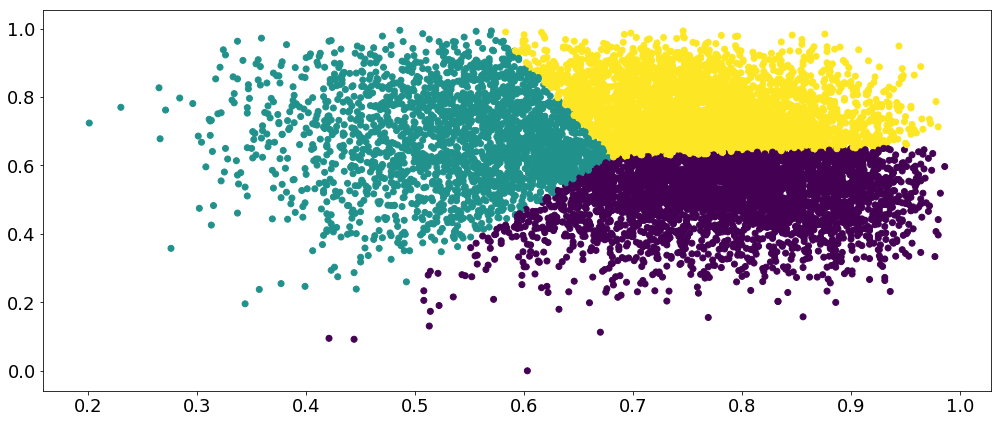

In [66]:
plt.scatter(d1, d2, c=km.labels_);


### Dimensionality Reduction

In [41]:
#This will reduce the number of random variables to consider and make the differences and similarities easier to see. 
dim_reduc = average_popularity.drop(['popularity', 'duration_ms', 'liveness', 'loudness', 'speechiness', 'valence'], axis=1)
dim_reduc

,acousticness,danceability,energy,instrumentalness,tempo
genre,,,,,
Pop,0.224819,0.640236,0.642208,0.016599,121.175844
Rap,0.168080,0.697244,0.650520,0.009317,121.100808
Rock,0.196429,0.538292,0.683670,0.053288,122.629630
Hip-Hop,0.176172,0.718808,0.643275,0.011200,120.791039
Dance,0.152888,0.638191,0.698067,0.035449,120.795919
Indie,0.331214,0.566821,0.581002,0.085317,119.290814
Anime,0.163175,0.541843,0.706616,0.054340,121.931104
Blues,0.163175,0.541843,0.706616,0.054340,121.931104
Children’s Music,0.163175,0.541843,0.706616,0.054340,121.931104


In [42]:
#Example on how the different genres differ. 

#Reduces the number of genres to make it easier to compare the differences. 
dim_reduc_compare = dim_reduc.drop(['Rap','Rock','Dance','Indie','Anime','Alternative','Folk','Soul','Country','Electronic','Reggaeton','Reggae','World','Soundtrack','Classical','Ska','Comedy','Opera','Movie','A Capella','Blues'])
dim_reduc_compare

,acousticness,danceability,energy,instrumentalness,tempo
genre,,,,,
Pop,0.224819,0.640236,0.642208,0.016599,121.175844
Hip-Hop,0.176172,0.718808,0.643275,0.011200,120.791039
Children’s Music,0.163175,0.541843,0.706616,0.054340,121.931104
R&B,0.288216,0.642125,0.564248,0.025558,116.373834
Jazz,0.499606,0.585638,0.472776,0.358009,111.783658


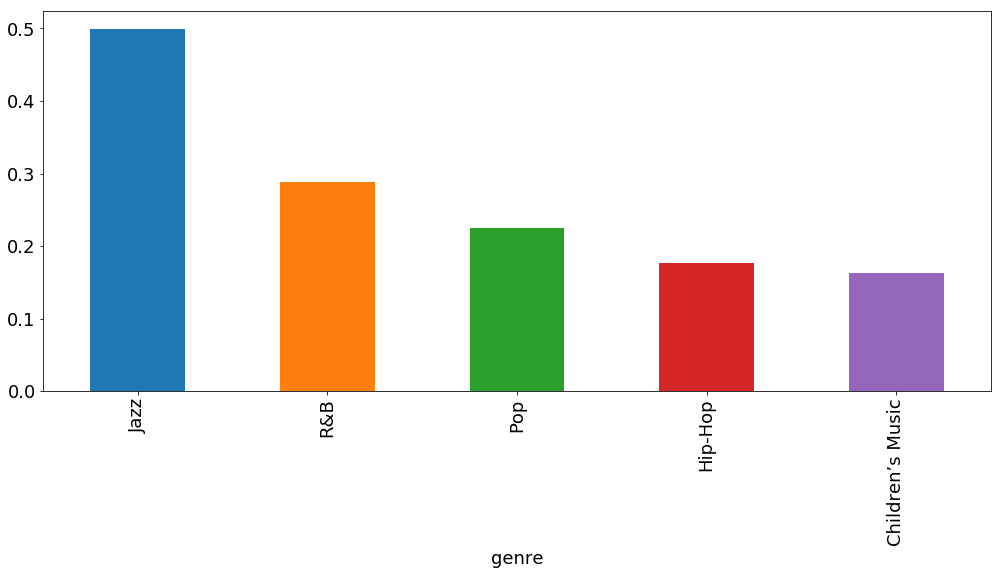

In [43]:
#Shows how genres differe in acousticness 
dim_reduc_graph1 = dim_reduc_compare.groupby(['genre']).mean().sort_values(by='acousticness', ascending=False)
dim_reduc_graph1['genre'] = dim_reduc_graph1.index
dim_reduc1_means=dim_reduc_graph1['acousticness']
dim_reduc1_means.plot.bar()

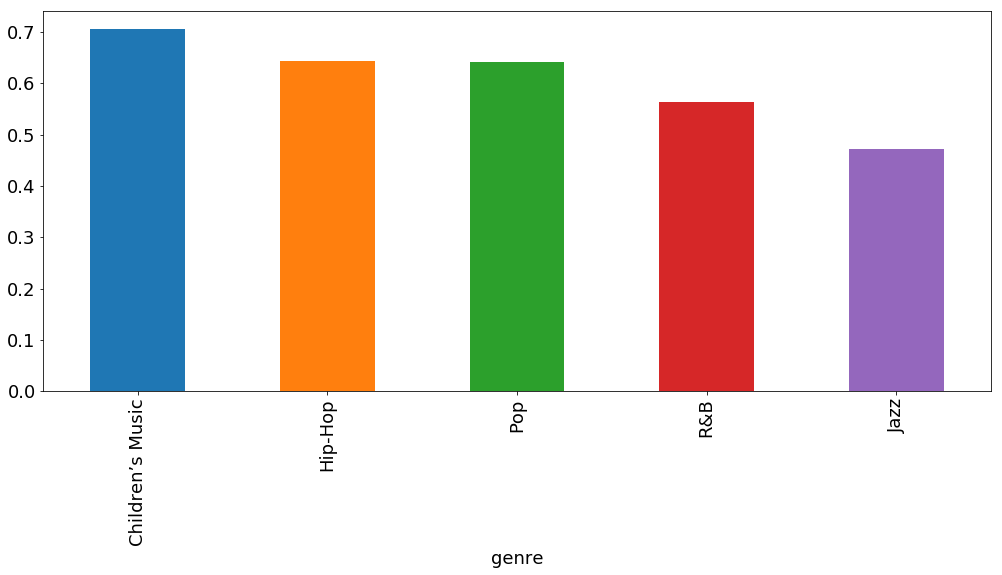

In [44]:
#Shows how genres differe in energy 
dim_reduc_graph2 = dim_reduc_compare.groupby(['genre']).mean().sort_values(by='energy', ascending=False)
dim_reduc_graph2['genre'] = dim_reduc_graph2.index
dim_reduc2_means=dim_reduc_graph2['energy']
dim_reduc2_means.plot.bar()

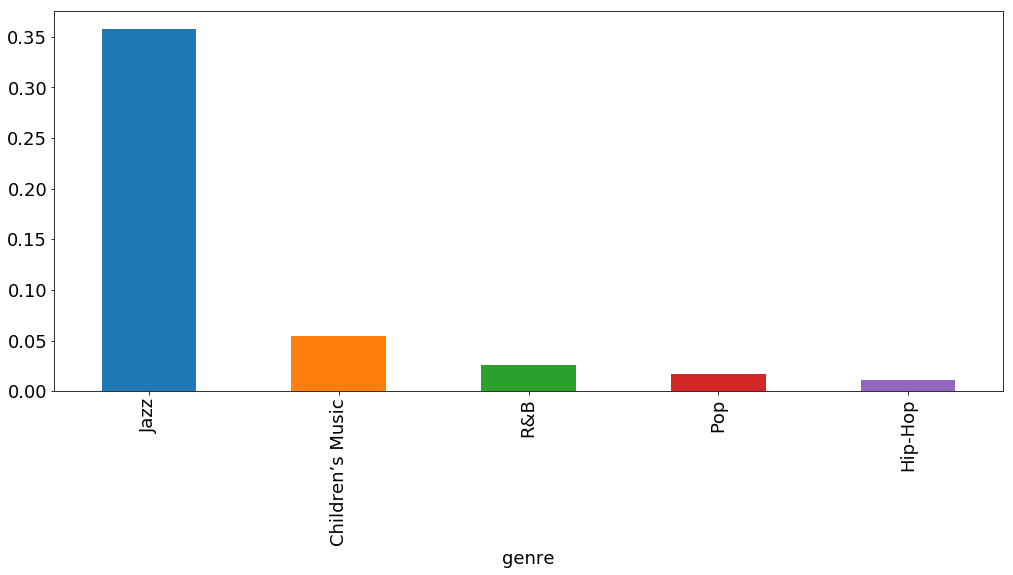

In [45]:
#Shows how genres differe in instrumentalness 
dim_reduc_graph3 = dim_reduc_compare.groupby(['genre']).mean().sort_values(by='instrumentalness', ascending=False)
dim_reduc_graph3['genre'] = dim_reduc_graph3.index
dim_reduc3_means=dim_reduc_graph3['instrumentalness']
dim_reduc3_means.plot.bar()

We noticed that certain generas are easiy indistinguishable based on acusticness, energy and instrumentalness. Tempo and dancability can also help determine what kind of genre the song is.


### SVM (testing - not sure if works or not)

In [46]:
#Testing to apply SVM in this cell just experimenting

#create a new df
e_df = df

#create a df with only genre of a song, the index, instrumentalness, accousticness, danceability, energy 
e_df = e_df.drop(columns=['artist_name', 'track_name', 'track_id', 'popularity', 'duration_ms', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'time_signature', 'valence'])

#removes all songs with genre acapella
e_df = e_df[e_df.genre != 'A Capella']


def convert_label(label):
    if label == 'Alternative':
        output = 1.0
    elif label == 'Anime':
        output = 2.0
    elif label == 'Blues':
        output = 3.0
    elif 'Children' in label:
        output = 4.0
    elif label == 'Classical':
        output = 5.0
    elif label == 'Comedy':
        output = 6.0
    elif label == 'Country':
        output = 7.0
    elif label == 'Dance':
        output = 8.0
    elif label == 'Electronic':
        output = 9.0
    elif label == 'Folk':
        output = 10.0
    elif label == 'Hip-Hop':
        output = 11.0
    elif label == 'Indie':
        output = 12.0
    elif label == 'Jazz':
        output = 13.0
    elif label == 'Movie':
        output = 14.0
    elif label == 'Opera':
        output = 15.0
    elif label == 'Pop':
        output = 16.0
    elif label == 'R&B':
        output = 17.0
    elif label == 'Rap':
        output = 18.0
    elif label == 'Reggae':
        output = 19.0
    elif label == 'Reggaeton':
        output = 20.0
    elif label == 'Rock':
        output = 21.0
    elif label == 'Ska':
        output = 22.0
    elif label == 'Soul':
        output = 23.0
    elif label == 'Soundtrack':
        output = 24.0
    elif label == 'World':
        output = 25.0
    else:
        output = label
        
    return output

e_df['genre_id'] = e_df['genre'].apply(convert_label)

e_df_X = e_df.drop(columns = 'genre')

e_df_X = e_df_X.as_matrix()

e_df_Y = e_df['genre_id']

num_training = int(len(e_df)*.6)
num_testing = int(len(e_df)*.4)

from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.model_selection import train_test_split

edf_train_X, edf_test_X, edf_train_y, edf_test_y = train_test_split(e_df_X, e_df_Y, train_size = num_training, test_size = num_testing )

def train_SVM(X, y, kernel='linear'):
    clf = SVC(kernel = 'linear')
    clf = clf.fit(X,y)
    
    return clf

edf_clf = train_SVM(edf_train_X, edf_train_y)

edf_predicted_train_y = edf_clf.predict(edf_train_X)

edf_predicted_test_y = edf_clf.predict(edf_test_X)

print(classification_report(edf_train_y,edf_predicted_train_y))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:73: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


             precision    recall  f1-score   support

        1.0       1.00      1.00      1.00      5644
        2.0       1.00      1.00      1.00      5602
        3.0       1.00      1.00      1.00      5582
        4.0       1.00      1.00      1.00      5635
        5.0       1.00      1.00      1.00      5573
        6.0       1.00      1.00      1.00      5768
        7.0       1.00      1.00      1.00      5173
        8.0       1.00      1.00      1.00      5180
        9.0       1.00      1.00      1.00      5586
       10.0       1.00      1.00      1.00      5557
       11.0       1.00      1.00      1.00      5605
       12.0       1.00      1.00      1.00      5707
       13.0       1.00      1.00      1.00      5709
       14.0       1.00      1.00      1.00      4714
       15.0       1.00      1.00      1.00      5045
       16.0       1.00      1.00      1.00      5701
       17.0       1.00      1.00      1.00      5370
       18.0       1.00      1.00      1.00   

# Ethics & Privacy

The Spotify dataset we are using originated from user Zaheen Hamidani on 'kaggle.com', an online community for data scientists to host datasets. The information in this dataset was gathered through the official Spotify API and was then cleaned, organized, and uploaded to ‘kaggle.com’. Because the dataset was created using the Spotify API as a source and does not include any surveyed information from people, we can claim that the data is secure. The Spotify API itself is open source, which gives us permission to use this data for this purpose. As a result, this dataset is appropriate to use for our project.


In terms of potential bias, the dataset could be subject to collection bias. The dataset contains information for over 228,159 songs however the number of songs represented per genre is not even. We saw this in the Data Cleaning section where the Comedy genre had 9681 songs, while the A Capella genre had only 119 songs. Though we removed the A Capella genre due to its underrepresentation, the slight difference in representations across genres could still affect how we interpret our analysis. Despite the outlier genre of A Capella, the remaining genres are within ~1500 entries of one another which gives validity when making our interpretations.
An unintended consequence of our analysis could result in the over generalization of a music genre’s attribute boundaries. We attempted to define the boundaries for ‘acousticness’, ‘danceability’, ‘instrumentalness’, ‘tempo’, and ‘energy’ for each genre, however our findings may not be conclusive enough to claim that we can accurately categorize songs based on these qualities.


# Conclusion & Discussion

*Fill in your discussion information here*